# Question - 1

* Author - Harshit Shambharkar
* Roll No.- ME21BTECH11019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
%matplotlib inline

In [3]:
# Defining parameters
L = 1
k = 45
Ta = 300
Tb = 400
n = 21
Tolerance = 1e-3

In [4]:
x = np.linspace(0,L,n,endpoint=True) #linspace(0, L, n)
h = x[1] - x[0] # grid size

* Analytical Solution
* We get the analytical solution by solving the differential equation,
  T(x) = 100x + 300

Text(0, 0.5, 'Temperature(T)')

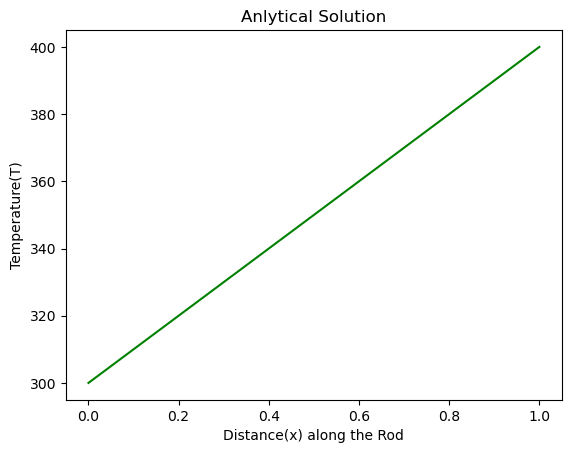

In [5]:
T_analytical = 100*x + 300
x_analytical = x
plt.plot(x_analytical, T_analytical, 'g-')
plt.title("Anlytical Solution")
plt.xlabel("Distance(x) along the Rod")
plt.ylabel("Temperature(T)")

                                                Jacobi Method

No. of Iterations in Jacobi Method:  751


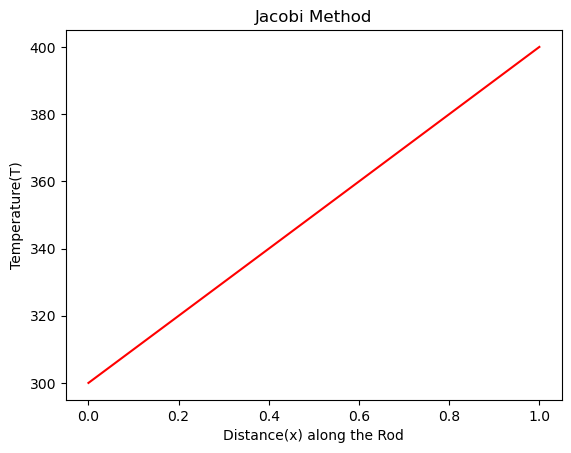

In [6]:
T_j = np.zeros(n)
#Intialising Boundary Conditions
T_j[0] = Ta
T_j[n-1] = Tb

T_old_j = np.copy(T_j)

#This keep track of number of iterations perfomed by the algorithm
iterations = 0
Error = 1

while Error > Tolerance:
    for i in range(1,n-1):
        T_j[i] = 0.5*(T_old_j[i-1] + T_old_j[i+1])
        
    Error = max(abs(T_j - T_old_j))
    #print(T)
    #print(T_old)
    T_old_j = np.copy(T_j)
    iterations = iterations + 1
    
plt.plot(x, T_j, 'r-')

plt.title("Jacobi Method")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
print("No. of Iterations in Jacobi Method: ", iterations)

Comparison of Numerical Result Against the Analytical solution

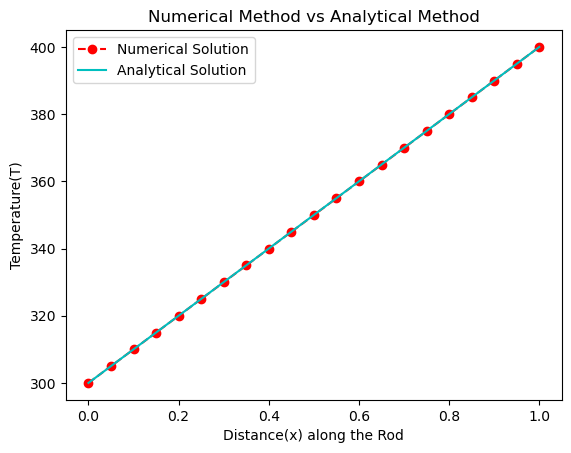

In [7]:
#Here Jacobi Method is used to compare with Numerical Solution
plt.plot(x, T_j, 'r--o')
plt.plot(x, T_analytical, 'c-')
plt.title("Numerical Method vs Analytical Method")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Numerical Solution", "Analytical Solution"])

                                            Gauss Siedel Method

No. of Iterations in Gauss Siedel Method:  378


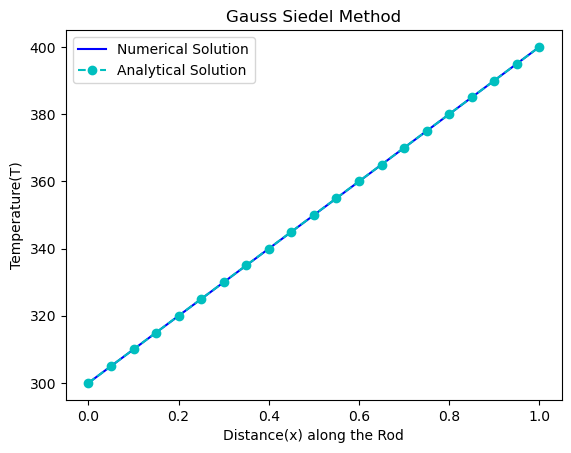

In [8]:
T_gs = np.zeros(n)
T_gs[0] = Ta
T_gs[n-1] = Tb

T_old_gs = np.copy(T_gs)
iterations = 0
Error = 1

# An error array is made to store the error(deviation of numerical result from actual)
Errors_gs = []
iterate_gs = []

while Error > Tolerance:
    for i in range(1,n-1):
        T_gs[i] = 0.5*(T_gs[i-1] + T_old_gs[i+1])
    Error = max(abs(T_gs - T_old_gs))
    #print(T)
    #print(T_old)
    iterations = iterations + 1
    iterate_gs.append(iterations)
    Errors_gs.append((linalg.norm(T_gs - T_old_gs, 2)) / linalg.norm(T_old_gs, 2))
    T_old_gs = np.copy(T_gs)

plt.plot(x, T_gs, 'b-')
plt.title("Gauss Siedel Method")
plt.plot(x, T_analytical, 'c--o')
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Numerical Solution", "Analytical Solution"])

print("No. of Iterations in Gauss Siedel Method: ", iterations)

                        Tridiagonal Matrix Algorithm (TDMA), Thomas Algorithm

Text(0.5, 0, 'Distance(x) along the Rod')

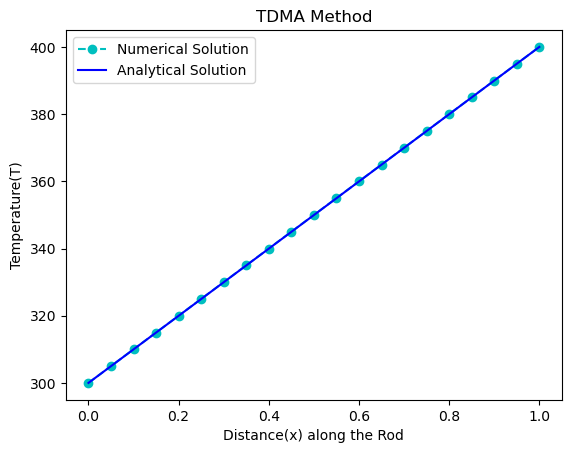

In [9]:
T_tdma = np.zeros(n)
T_tdma[0] = Ta
T_tdma[n-1] = Tb

P = np.zeros(n)
Q = np.zeros(n)

a, b, c, d = 2, 1, 1, 0

P[0] = 0
Q[0] = Ta

for i in range(1,n-1):
    P[i] = b / (a - c*P[i-1])
    Q[i] = (d + c*Q[i-1]) / (a - c*P[i-1])
    
Q[n-1] = T_tdma[n-1]
    
for i in range(n-2,-1, -1):
    T_tdma[i] = T_tdma[i+1]*P[i] + Q[i]

plt.plot(x, T_tdma, 'c--o')
plt.plot(x, T_gs, 'b-')
plt.title("TDMA Method")
plt.legend(["Numerical Solution", "Analytical Solution"])
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")

                                        Analysis of Numerical Error

Text(0, 0.5, 'Error')

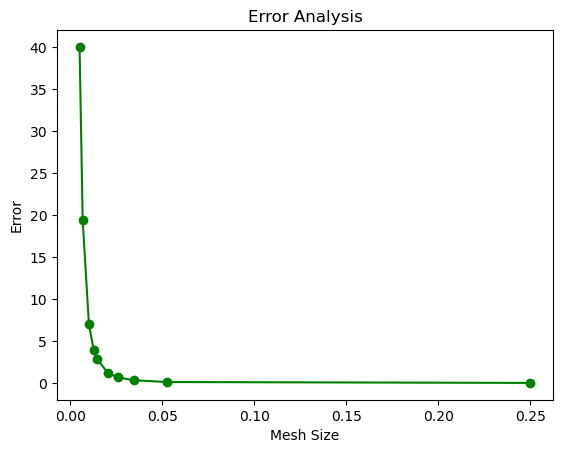

In [10]:
grid_points = [5, 20, 30, 40, 50, 70, 80, 100, 150, 200]
# Error(deviation from analytical solution) from one of the iterative method, gauss siedel is plotted below
Error_t = []
mesh_size = []

for grid_point in grid_points:
 
    x_t = np.linspace(0,L,grid_point,endpoint=True) #linspace(0, L, n)
    mesh_size.append(x_t[1] - x_t[0])
    # Gauss Siedel
    T_t = np.zeros(grid_point)
    T_t[0] = Ta
    T_t[grid_point-1] = Tb

    T_old_t = np.copy(T_t)
    iterations = 0
    Error = 1

    while Error > Tolerance:
        for i in range(1,grid_point-1):
            T_t[i] = 0.5*(T_t[i-1] + T_old_t[i+1])
        Error = max(abs(T_t - T_old_t))
        #print(T)
        #print(T_old)
        iterations = iterations + 1
        T_old_t = np.copy(T_t)
        
    T_analytic = 100*x_t + 300 
    # Norm 2  is used
    Error_t.append((linalg.norm(T_t - T_analytic, 2)))

plt.plot(mesh_size, Error_t, 'g-o')
plt.title("Error Analysis")
plt.xlabel("Mesh Size")
plt.ylabel("Error")

                        Plotting of Heat Distribution along the length of the rod 

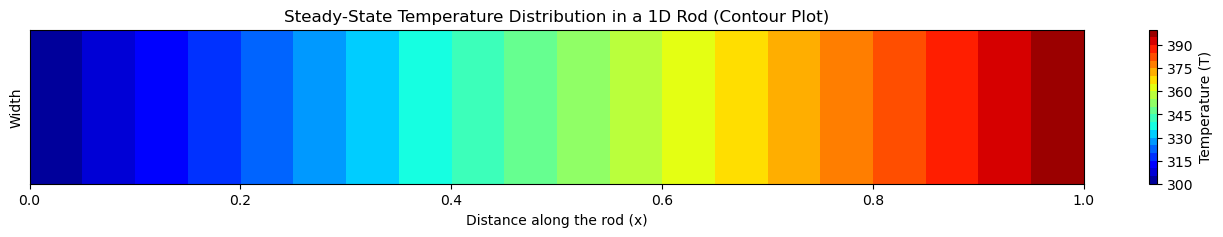

In [11]:
y = np.linspace(0,0.2,10)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(17,2))

T_plot = np.zeros((10,n))
for i in range(10):
    T_plot[i,:] = T_gs
    
contour = plt.contourf(X, Y, T_plot, levels=20, cmap=plt.cm.jet)
plt.colorbar(contour, label='Temperature (T)')
plt.xlabel('Distance along the rod (x)')
plt.ylabel('Width')
plt.yticks([])
plt.title('Steady-State Temperature Distribution in a 1D Rod (Contour Plot)')
plt.show()


                                          Non - Uniform Grid Size

No. of Iterations in Gauss Siedel Method with Non Uniform Grid:  526


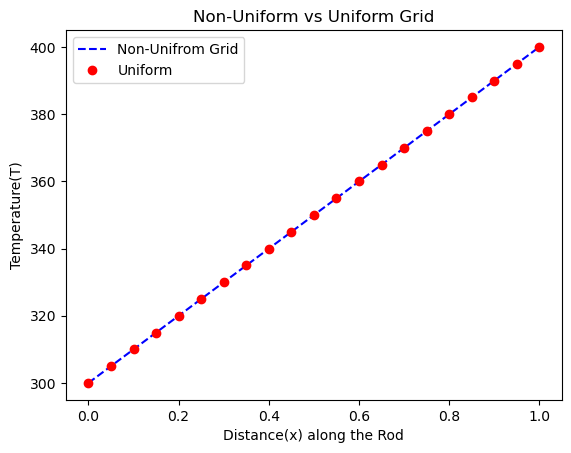

In [12]:
#Discritise domain with non uniform grid
# Function used for generating non - uniform grid as taught in class
# I have used Gauss Siedel Method to solve for non-uniform grid
p = 0.3
x_nu = np.zeros(n)

for i in range(1,n):
    x_nu[i] = L*((i + 1 - 1) / (n - 1))**p
# print(x)
    
T_nu = np.zeros(n)
T_nu[0] = Ta
T_nu[n-1] = Tb

T_old_nu = np.copy(T_nu)

iterations = 0
Error = 1
Errors_nu = []
iterate_nu = []

while Error > Tolerance:
    for i in range(1,n-1):
        R = (x_nu[i+1] - x_nu[i]) / (x_nu[i] - x_nu[i-1])
        T_nu[i] = (R*T_nu[i-1] + T_old_nu[i+1]) / (1 + R)
    Error = max(abs(T_nu - T_old_nu))
    #print(T)
    #print(T_old)
    iterations = iterations + 1
    iterate_nu.append(iterations)
    # Storing error for non uniform grid, l2 norm is used
    Errors_nu.append((linalg.norm(T_nu - T_old_nu, 2)) / linalg.norm(T_old_nu, 2))
    T_old_nu = np.copy(T_nu)


plt.plot(x_nu, T_nu, 'b--')
plt.plot(x, T_gs, 'ro')

plt.title("Non-Uniform vs Uniform Grid")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Non-Unifrom Grid", "Uniform"])

print("No. of Iterations in Gauss Siedel Method with Non Uniform Grid: ", iterations)

Text(0, 0.5, 'Log(Error)')

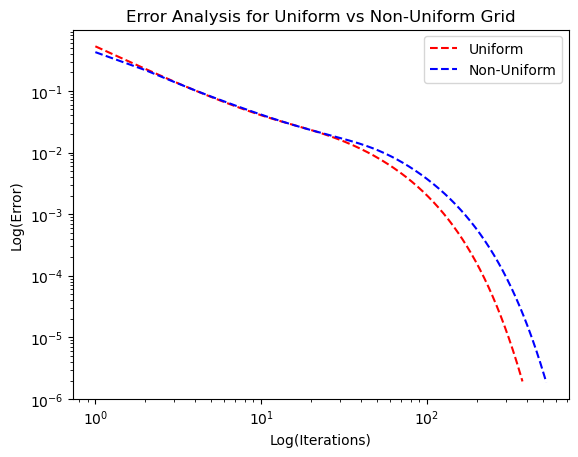

In [13]:
# Plotting of error(in log scale)
plt.xscale('log')
plt.yscale('log')
plt.plot((iterate_gs), (Errors_gs), 'r--')
plt.plot((iterate_nu), (Errors_nu), 'b--')
plt.title("Error Analysis for Uniform vs Non-Uniform Grid")
plt.legend(["Uniform", "Non-Uniform"])
plt.xlabel("Log(Iterations)")
plt.ylabel("Log(Error)")
#plt.ylim(0,3)